In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Считывание датасета и просмотр статистик

In [2]:
df = pd.read_csv("train.csv.zip", compression="zip")

In [3]:
df.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 116.0+ MB


In [5]:
# числовые признаки
df.describe()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,114321.000000,114321.000000,6.448900e+04,6.452500e+04,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,...,6.448100e+04,6.447000e+04,63643.000000,6.570200e+04,6.448900e+04,6.448900e+04,6.569700e+04,114321.000000,6.447800e+04,6.442600e+04
mean,114228.928228,0.761199,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,...,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,65934.487362,0.426353,1.082813e+00,2.961676e+00,1.148263e+00,2.036018e+00,5.999653e-01,5.894485e-01,2.783003e+00,1.930262e+00,...,1.356294e+00,1.795978e+00,2.604704,2.099407e+00,5.031683e-01,1.625988e+00,1.074232e+00,0.693262,1.264497e+00,1.134702e+00
min,3.000000,0.000000,-9.996497e-07,-9.817614e-07,-6.475929e-07,-5.287068e-07,-9.055091e-07,-9.468765e-07,-7.783778e-07,-9.828757e-07,...,-9.820642e-07,-9.978497e-07,0.019139,-9.994953e-07,-9.564174e-07,-9.223798e-07,8.197812e-07,0.000000,-9.901257e-07,-9.999134e-07
25%,57280.000000,1.000000,9.135798e-01,5.316428e+00,3.487398e+00,7.605918e+00,2.065064e+00,2.101477e+00,8.658986e-02,7.853659e+00,...,1.786965e+00,5.647712e+00,1.963315,2.053777e-02,1.417600e+00,2.101900e+00,1.393830e+00,0.000000,1.106172e+00,1.012658e+00
50%,114189.000000,1.000000,1.469550e+00,7.023803e+00,4.205991e+00,8.670867e+00,2.412790e+00,2.452166e+00,3.860317e-01,9.059582e+00,...,2.436195e+00,6.749117e+00,2.739239,1.398639e-01,1.614802e+00,2.963620e+00,1.798436e+00,0.000000,1.560138e+00,1.589403e+00
75%,171206.000000,1.000000,2.136128e+00,9.465497e+00,4.833250e+00,9.771353e+00,2.775285e+00,2.834285e+00,1.625246e+00,1.023256e+01,...,3.379175e+00,7.911392e+00,4.075361,8.718333e-01,1.843886e+00,4.108146e+00,2.390158e+00,0.000000,2.332425e+00,2.261905e+00
max,228713.000000,1.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,...,2.000000e+01,2.000000e+01,19.686069,2.000000e+01,1.563161e+01,2.000000e+01,2.000000e+01,11.000000,2.000000e+01,2.000000e+01


In [6]:
# категориальные признаки
df.describe(include=['object'])

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
count,110864,113821,114321,54211,110864,114321,114318,107439,114321,114321,114321,114321,114321,114318,114318,114321,113939,59017,114244
unique,3,18210,5,7,3,10,12,122,3,9,3,4,18,7,7,3,22,36,90
top,C,AGDF,E,C,A,C,J,BW,A,F,B,D,C,A,E,A,F,G,BM
freq,110584,2386,55177,32178,88347,55425,11103,11351,70353,75094,113560,75087,34561,27079,27079,55688,21671,16252,5759


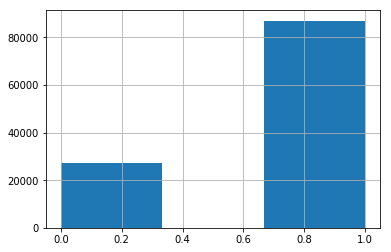

In [7]:
# целевая переменная несбалансированная, но не критично
df.target.hist(bins=3)
plt.show()

In [8]:
# большое количество пропусков
df.isnull().sum().sort_values(ascending=False)

v30       60110
v113      55304
v102      51316
v85       50682
v119      50680
          ...  
v75           0
v79           0
v110          0
target        0
ID            0
Length: 133, dtype: int64

In [9]:
# удалим сильно коррелированные между собой признаки >=0.9
Corr = df.drop(columns=['target', 'ID']).corr()
CorField = list(combinations(Corr.columns, 2))
corr_pair = [(i[0], i[1], Corr.loc[i]) for i in CorField if abs(Corr.loc[i]) >= 0.9]
counter = Counter([i[0] for i in corr_pair]) + Counter([i[1] for i in corr_pair])
feature_remove = set([i[0] if counter[i[0]] >= counter[i[1]] else i[1] for i in corr_pair ])
feature  = list(set(df.columns) - feature_remove) 
df = df[feature]

In [10]:
# проверим, что их больше не осталось >=0.9
Corr = df.drop(columns=['target']).corr()
CorField = list(combinations(Corr.columns, 2))
corr_pair = [(i[0], i[1], Corr.loc[i]) for i in CorField if abs(Corr.loc[i]) >= 0.9]
corr_pair

[]

In [11]:
# функция для отеделения числовых признаков
def num(data):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    try:
        return data.select_dtypes(include=numerics).drop(['ID','target'], axis=1)
    except KeyError:
        return data.select_dtypes(include=numerics).drop(['ID'], axis=1)

# функция для отделения категориальных признаков
def obj(data):
    category = ['object']
     # удалим переменную 'v22' с большим количеством категорий
    return data.select_dtypes(include=category).fillna("na").drop(['v22'], axis=1)
    
# функция для замены NaN на ноль, среднее значение или медиану
def emp(data, emp = "zero"):
    if emp == "zero":
        fill = 0
    elif emp == "ave":
        fill = data.mean()
    elif emp == 'med':
        fill = data.median()
    return data.fillna(fill)

In [12]:
# собираем pipeline для преобразований признаков, добавляем нормализатор числовых признаков
# числовые признаки:
numerical_selector = FunctionTransformer(num, validate=False)
empty = FunctionTransformer(emp, validate=False)
scaler = StandardScaler() 

numerical_features_scaler = Pipeline([
    ("numerical_selector", numerical_selector),
    ("empty", empty),
    ('scaler', scaler)
])
numerical_features_scaler.fit_transform(df).shape

(114321, 82)

In [13]:
# категориальные признаки:
category_selector = FunctionTransformer(obj, validate=False)
one_hot = OneHotEncoder(handle_unknown='ignore', sparse=False)

category_features_onehot = Pipeline([
    ("category_selector", category_selector),
    ("one_hot", one_hot)
])
category_features_onehot.fit_transform(df).shape

(114321, 374)

In [14]:
# соединяем признаки:
preprocessing_pipeline = FeatureUnion([
    ("numerical", numerical_features_scaler),
    ("categorical", category_features_onehot)  
])
preprocessing_pipeline.fit_transform(df).shape

(114321, 456)

## Проверим качество работы алгоритмов на метрика f1

In [15]:
# добавляем в pipeline лог. регрессию и выберем 10 самых важных признаков,
# поскольку на SVM будут очень долго отбираться лучшие параметры. ставим все алгоритмы в равные условия по признакам.
kbest = SelectKBest()
log_reg = LogisticRegression()
pipe_log = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ('kbest', kbest),
    ("modelling", log_reg)
])
# посмотрим какие параметры можем перебрать на сетке
pipe_log.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'kbest', 'modelling', 'preprocessing__n_jobs', 'preprocessing__transformer_list', 'preprocessing__transformer_weights', 'preprocessing__verbose', 'preprocessing__numerical', 'preprocessing__categorical', 'preprocessing__numerical__memory', 'preprocessing__numerical__steps', 'preprocessing__numerical__verbose', 'preprocessing__numerical__numerical_selector', 'preprocessing__numerical__empty', 'preprocessing__numerical__scaler', 'preprocessing__numerical__numerical_selector__accept_sparse', 'preprocessing__numerical__numerical_selector__check_inverse', 'preprocessing__numerical__numerical_selector__func', 'preprocessing__numerical__numerical_selector__inv_kw_args', 'preprocessing__numerical__numerical_selector__inverse_func', 'preprocessing__numerical__numerical_selector__kw_args', 'preprocessing__numerical__numerical_selector__validate', 'preprocessing__numerical__empty__accept_sparse', 'preprocessing__numerical__empty__check_inv

In [16]:
%%time
param_grid = {
    'modelling__penalty': ['l1', 'l2'],
    'modelling__C': np.logspace(-2, 1, 10),
    'modelling__class_weight':['balanced'],
    'preprocessing__numerical__empty__kw_args': [{'emp':'ave'}, {'emp':'zero'}, {'emp':'med'}]
}
search_log = GridSearchCV(pipe_log, param_grid, cv=5, scoring='f1', n_jobs=-1)
search_log.fit(df, df['target'])

Wall time: 4min 22s


In [17]:
# лучшие параметры модели
search_log.best_params_

{'modelling__C': 0.01,
 'modelling__class_weight': 'balanced',
 'modelling__penalty': 'l2',
 'preprocessing__numerical__empty__kw_args': {'emp': 'ave'}}

In [18]:
# лучшая f1 метрика лог. регрессии
search_log.best_score_

0.6923332268757638

In [19]:
# собираем pipeline с KNN алгоритмом
kbest = SelectKBest()
knn = KNeighborsClassifier()
pipe_knn = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ('kbest', kbest),
    ("modelling", knn)
])
# параметры
pipe_knn.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'kbest', 'modelling', 'preprocessing__n_jobs', 'preprocessing__transformer_list', 'preprocessing__transformer_weights', 'preprocessing__verbose', 'preprocessing__numerical', 'preprocessing__categorical', 'preprocessing__numerical__memory', 'preprocessing__numerical__steps', 'preprocessing__numerical__verbose', 'preprocessing__numerical__numerical_selector', 'preprocessing__numerical__empty', 'preprocessing__numerical__scaler', 'preprocessing__numerical__numerical_selector__accept_sparse', 'preprocessing__numerical__numerical_selector__check_inverse', 'preprocessing__numerical__numerical_selector__func', 'preprocessing__numerical__numerical_selector__inv_kw_args', 'preprocessing__numerical__numerical_selector__inverse_func', 'preprocessing__numerical__numerical_selector__kw_args', 'preprocessing__numerical__numerical_selector__validate', 'preprocessing__numerical__empty__accept_sparse', 'preprocessing__numerical__empty__check_inv

In [20]:
%%time
param_grid = {
    'modelling__n_neighbors': range(2, 51),
    'modelling__metric': ['euclidean', 'manhattan', 'minkowski', 'wminkowski'],
    'preprocessing__numerical__empty__kw_args': [{'emp':'ave'}, {'emp':'zero'}, {'emp':'med'}]
}
search_knn = RandomizedSearchCV(pipe_knn, param_grid, cv=5, scoring='f1')
search_knn.fit(df, df['target'])

Wall time: 5min 31s


In [21]:
# лучшие параметры модели KNN
search_knn.best_params_

{'preprocessing__numerical__empty__kw_args': {'emp': 'zero'},
 'modelling__n_neighbors': 47,
 'modelling__metric': 'minkowski'}

In [22]:
# лучшая f1 метрика KNN алгоритма
search_knn.best_score_

0.8617176819960506

In [23]:
kbest = SelectKBest()
svc = SVC()
pipe_svc = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ('kbest', kbest),
    ("modelling", svc),
])

pipe_svc.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'kbest', 'modelling', 'preprocessing__n_jobs', 'preprocessing__transformer_list', 'preprocessing__transformer_weights', 'preprocessing__verbose', 'preprocessing__numerical', 'preprocessing__categorical', 'preprocessing__numerical__memory', 'preprocessing__numerical__steps', 'preprocessing__numerical__verbose', 'preprocessing__numerical__numerical_selector', 'preprocessing__numerical__empty', 'preprocessing__numerical__scaler', 'preprocessing__numerical__numerical_selector__accept_sparse', 'preprocessing__numerical__numerical_selector__check_inverse', 'preprocessing__numerical__numerical_selector__func', 'preprocessing__numerical__numerical_selector__inv_kw_args', 'preprocessing__numerical__numerical_selector__inverse_func', 'preprocessing__numerical__numerical_selector__kw_args', 'preprocessing__numerical__numerical_selector__validate', 'preprocessing__numerical__empty__accept_sparse', 'preprocessing__numerical__empty__check_inv

In [24]:
%%time
param_grid = {
    'modelling__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'modelling__C': np.logspace(-2, 1, 10),
    'preprocessing__numerical__empty__kw_args': [{'emp':'ave'}, {'emp':'zero'}, {'emp':'med'}]
}
search_svc = RandomizedSearchCV(pipe_svc, param_grid, cv=5, scoring='f1', n_jobs=-1)
search_svc.fit(df, df['target'])

Wall time: 6h 12min 19s


In [25]:
# лучшие параметры модели SVC
search_svc.best_params_

{'preprocessing__numerical__empty__kw_args': {'emp': 'zero'},
 'modelling__kernel': 'linear',
 'modelling__C': 1.0}

In [26]:
# лучшая f1 метрика SVC алгоритма
search_svc.best_score_

0.8644098101202203

## Краткие этапы и выводы:

###### 1) Был загружен train.csv. В test.csv нет целевой переменной 'target', поэтому все преобразования и метрики были в дальнейшем только на train.

###### 2) Целевая переменная не сбалансирована, но минорного класса достаточно для адекватной работы алгоритма.
###### Кроме того, SVM обучается очень долго, поэтому повышать количество минорных объектов еще больше увеличит время его обучения.

###### 3) Достаточно много NaN, поэтому выбор чем их заменять может существенно повлиять на качество работы алгоритма.
###### Решил функцию замены NaN добавить в pipeline для поиска лучшего варианта на сетке.

###### 4) Удалены сильно коррелированные числовые признаки >= 0,9

###### 5) Числовые и категориальные признаки были разделены и далее объединены через pipeline.
###### Числовые нормализованы - StandardScaler, категориальные бинарно закодированы  - OneHotEncoder, признак 'v22' удален по причина большого числа уникальных значений в нем - 18тыс.

###### 6) Из-за длительного времени обучения SVM пришлось сократить число призанков до 10 самых важных - SelectKBest

###### 7) Тестировались три алгоритма  - LogReg, KNN,  SVM.
- Хуже всего качество оказалось у LogReg, f1=0,69;
- Лучшее качество показали SVM и неожиданно KNN f1=0,86, но у SVM намного больше времени уходит на обучение;
- SVM показал неожиданно лучшее качество на линейном ядре;
- В LogReg лучше оказалось NaN заменять на среднее значение, в KNN и SVM на ноль.

###### P.S.
 - Возможно было бы переменную 'v22' не удалять, а применить hash-кодирование, либо же наиболее редко встречающиеся значения объединить в одно;
 - Поменять функцию отбора лучших признаков в SelectKBest;
 - В процессе работы у LogReg были использованы так же и все признаки в выборке, но качество все равно не достигло SVM и KNN, f1=0,73